In [1]:
import pandas as pd
import sys
import os

In [2]:
sys.path.append(os.path.abspath('C:/Users/teeyob/OilSight/scripts'))

In [3]:
file_path= 'C:/Users/teeyob/OilSight/data/Copy of BrentOilPrices.csv'


load and clean

In [4]:
from data_analysis import load_and_clean_data,plot_oil_price,change_point_detection,summarize_data,apply_arima_model,apply_garch_model,check_stationarity,export_results_to_markdown

data1=load_and_clean_data(file_path)

data1=load_and_clean_data(file_path)

C:\Users\teeyob\OilSight\scripts\data_analysis.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\teeyob\OilSight\scripts\data_analysis.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\teeyob\OilSight\scripts\data_analysis.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\teeyob\OilSight\scripts\data_analysis.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill(

In [5]:
data1.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [6]:
data1.isna().sum()

Date     0
Price    0
dtype: int64

Summarize the Brent oil price data

In [7]:
summary = summarize_data(data1)

                     Metric        Value
0                Start Date     0.000000
1                  End Date  9010.000000
2        Total Observations  9011.000000
3            Missing Values     0.000000
4                Price Mean    48.420782
5  Price Standard Deviation    32.860110
6                 Price Min     9.100000
7                 Price Max   143.950000


Plot the oil price time series

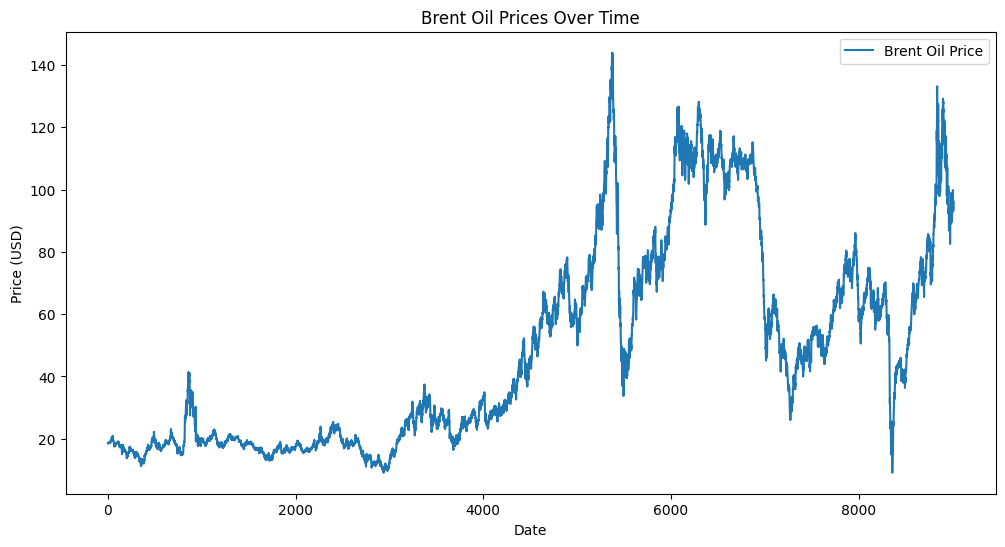

In [8]:
plot_oil_price(data1)

Detect change points in Brent oil prices

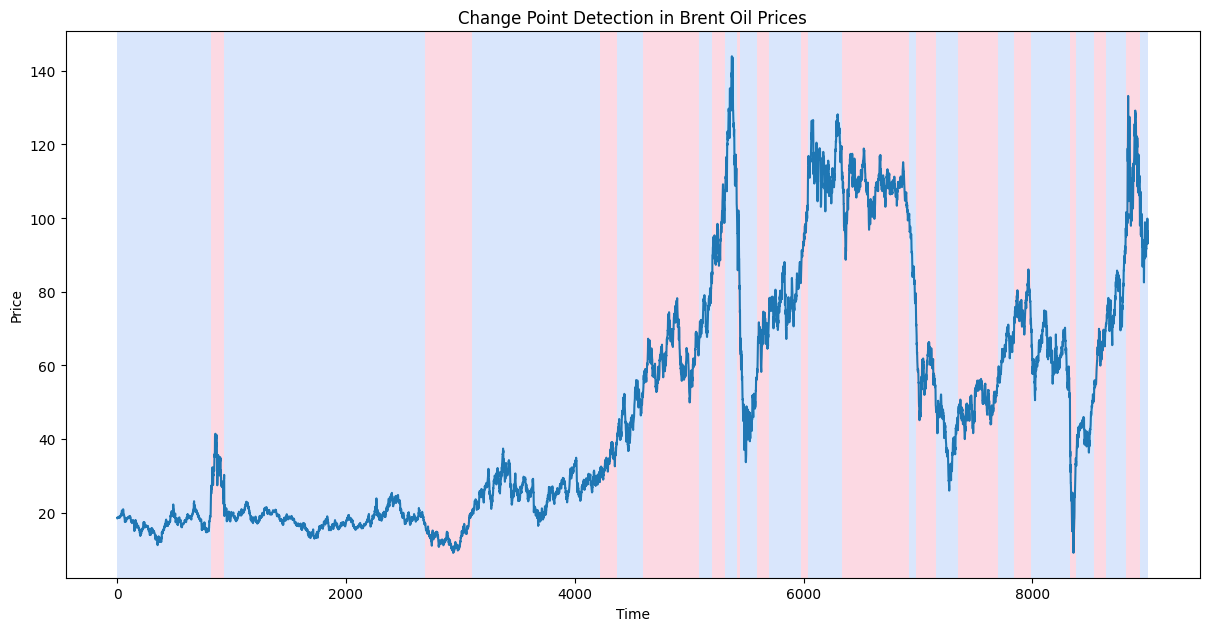

In [9]:
change_points = change_point_detection(data1)

Applies AutoRegressive Integrated Moving Average on column named 'Price'

In [10]:
apply_arima_model(data1)

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 01 Nov 2024   AIC                          29093.899
Time:                        17:14:46   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

applies the Generalized Autoregressive Conditional Heteroskedasticity model to estimate and predict volatility in the time series

In [11]:
apply_garch_model(data1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3874927804.158277
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70148.68734205695
Iteration:      3,   Func. Count:     19,   Neg. LLF: 924509187.1107914
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44099.26204018903
Iteration:      5,   Func. Count:     33,   Neg. LLF: 41882.581755042986
Iteration:      6,   Func. Count:     39,   Neg. LLF: 41190.23335963133
Iteration:      7,   Func. Count:     46,   Neg. LLF: 40221.97253756566
Iteration:      8,   Func. Count:     52,   Neg. LLF: 38675.84139852016
Iteration:      9,   Func. Count:     58,   Neg. LLF: 46507.19984815386
Iteration:     10,   Func. Count:     64,   Neg. LLF: 52311.49939565074
Iteration:     11,   Func. Count:     73,   Neg. LLF: 39566.28900289833
Iteration:     12,   Func. Count:     79,   Neg. LLF: 37683.04414723057
Iteration:     13,   Func. Count:     85,   Neg. LLF: 38550.85348090723
Iteration:     14,   Func. Count:     91,   Neg. LLF: 48052.343

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35221.8
Distribution:                  Normal   AIC:                           70451.5
Method:            Maximum Likelihood   BIC:                           70479.9
                                        No. Observations:                 9011
Date:                Fri, Nov 01 2024   Df Residuals:                     9010
Time:                        17:15:19   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5742      0.108    172.353      0.000 [ 18.363, 18.78

uses the Augmented Dickey-Fuller (ADF) test to check if the time series data is stationary

In [12]:
check_stationarity(data1)

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


np.False_

generates a Markdown file summarizing the analysis results

In [13]:
export_results_to_markdown(summary)

Results exported to analysis_report.md
